## Import and read the file "mpg.csv"

In [115]:
import csv
import numpy as np

In [116]:
csvfile = open("mpg.csv")
mpg = list(csv.reader(csvfile))
# mpg[:3]

## Move the column headings to another variable and transform list into a Numpy array

In [117]:
# First element is the column heading so index 0 at the list
mpg_table_header = mpg[0]

# Remove the first element by reshaping it
mpg = mpg[1:]
mpg_arr = np.asarray(mpg)

# display(mpg_arr)
display(mpg_table_header)
# display(mpg)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

## Need to replace all occurence of '?' with 'None

In [118]:
# Helper function to replace the unwanted characters
def check_and_replace(char, charToReplace, replacement):
    if char == charToReplace:
        return replacement
    return char

def convert_to_float(value):
    if value == 'None':
        return float('nan')
    return value

# Call the function for every element in the list and use the return value as the new value
mpg = [[check_and_replace(item, '?', np.nan) for item in row] for row in mpg]

# Extract the last element (the car column name) as a list
mpg_car_names = [row[-1] for row in mpg]

# Extract all other columns except the last column
mpg_table_values = [row[:-1] for row in mpg]

# Convert None to float(nan) to allow float conversion 
mpg_table_values = [[convert_to_float(item) for item in row] for row in mpg_table_values]
mpg_arr = np.asarray(mpg_table_values, dtype = "float")

In [147]:
# Helper function to calculate the average of the column based on another column's unique values
# target_column: column of the average to be calculated
# mpg_column: column where the mpg values are
def get_average_mpg_for_values(target_column, mpg_column):
    # Finds all the unique values in the column
    unique_vals = np.unique(target_column)
    # Creates a table with 2 columns where the left side is the average and the right side is the corresponding value
    res_table = np.zeros(shape=(len(unique_vals), 1))
    res_table_idx = 0
    
    for unique in unique_vals:
        # Get the indexes of where the unique values occur in the column
        where_unique = np.where(target_column == unique)
        res_table[res_table_idx] = np.sum(mpg_column[where_unique]) / len(where_unique[0])
        res_table_idx = res_table_idx + 1
    
    return res_table

# first element of the list is the corresponding unique value, second element is the averages
def create_average_table(target_column, mpg_column_idx, mpg_table):
    unique_vals = np.unique(target_column)
    avg_table = []
    avg_table.append(unique_vals)
    avg_table.append(get_average_mpg_for_values(target_column, mpg_table[:, mpg_column_idx]))
    return avg_table
    
average_mpg_cylendars = create_average_table(mpg_arr[:, 1], 0, mpg_arr)
average_mpg_model_year = create_average_table(mpg_arr[:, 6], 0, mpg_arr)

# Need to strip the car name columns for only the manufacturer then convert it to np array to use np.where properly
car_manufacturer = [item.split(' ')[0] for item in mpg_car_names]
car_manufacturer = np.asarray(car_manufacturer)
average_mpg_manufacturer = create_average_table(car_manufacturer, 0, mpg_arr)

## Count the number of cars in the dataset for each manufacturer

In [153]:
# Simply count the number of occurences for each manufacturer using np.unique and np.where like the helper
car_produced_manufacturer = []
unique_manufacturer = np.unique(car_manufacturer)
car_produced_manufacturer.append(unique_manufacturer)

num_cars_created = np.zeros(len(unique_manufacturer))
idx = 0;
for item in unique_manufacturer:
    num_cars_created[idx] = len(np.where(car_manufacturer == item)[0])
    idx = idx + 1

car_produced_manufacturer.append(num_cars_created) 
display(car_produced_manufacturer)

[array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
        'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
        'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
        'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
        'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
        'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
        'vw'], dtype='<U13'),
 array([28.,  7.,  2., 17.,  2.,  1.,  1., 43.,  3.,  6., 23., 28.,  8.,
        51.,  1., 13.,  2., 10.,  1.,  2., 11.,  1., 10.,  4.,  8., 31.,
        16.,  5.,  4.,  4., 25.,  1.,  1.,  1., 15.,  6.,  6.])]

## Calculate correlation beween mpg and other variables, like displacement, horsepower, weight and others. Find the most and least influential variables on auto fuel economy

## Use matplotlib library to plot average mpg for each manufacturer.

In [151]:
import matplotlib.pyplot as plt

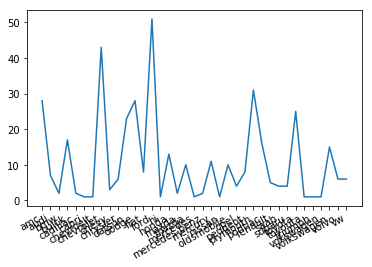

## Plots average mpg for every variable it is given. Use the function to plot average mpg for each origin.